In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
import os
from pathlib import Path
dir = os.path.realpath('..')
# `cwd`: current directory is straightforward
# cwd = Path.cwd()
fname = os.path.join(dir, 'calibration_data/RampTest_2022-01-13_202229.csv')

In [10]:
fname

'/Users/jdrockton/OneDrive/Documents/Spring 2022/Quadlab_team4/calibration_data/RampTest_2022-01-13_202229.csv'

In [11]:
df = pd.read_csv(fname)

•	RPM vs. PWM curve
•	Thrust vs. PWM curve
•	Efficiency vs. RPM
•	Thrust vs. RPM
•	Torque vs. RPM

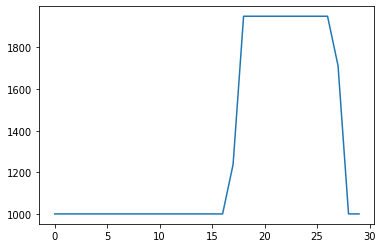

In [12]:
plt.plot(df['ESC signal (µs)'])

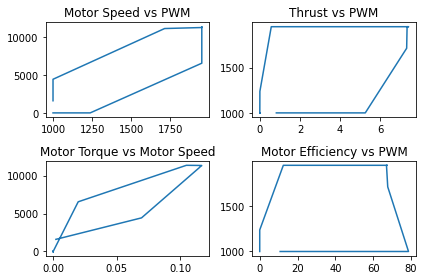

In [19]:
plt.subplot(2,2,1)
plt.plot(df['ESC signal (µs)'],df['Motor Optical Speed (RPM)'])
plt.title('Motor Speed vs PWM')
plt.subplot(2,2,2)
plt.plot(df['Thrust (N)'],df['ESC signal (µs)'])
plt.title('Thrust vs PWM')
plt.subplot(2,2,3)
plt.plot(df['Torque (N·m)'],df['Motor Optical Speed (RPM)'])
plt.title('Motor Torque vs Motor Speed')

plt.subplot(2,2,4)
plt.plot(df['Motor Efficiency (%)'],df['ESC signal (µs)'])
plt.title('Motor Efficiency vs PWM')

plt.tight_layout()